In [1]:
# import the essential libraries

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import chart_studio.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px
from scipy import  stats

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [24]:
# importing the dataset
df = pd.read_csv('Covid_dataset.csv',parse_dates=['Date'])
df.drop('Unnamed: 0',1,inplace=True)

In [25]:
df_age_factor = pd.read_csv('Covid_age_factor.csv')
df_age_factor.drop('Unnamed: 0',1,inplace=True)

In [26]:
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [27]:
df.tail()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0
6602,2020-05-18,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,NaN


In [28]:
df_age_factor.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [29]:
df_age_factor.tail()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045
212,Saint Pierre Miquelon,NaN,NaN,NaN


In [30]:
# shapes of thed dataset
df.shape

(6603, 9)

In [31]:
df_age_factor.shape

(213, 4)

In [32]:
# checking for missing values

In [33]:
df.isna().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             60
dtype: int64

In [34]:
df.isna().mean()

Date                   0.000000
Country                0.000000
Population             0.000000
Total Tests            0.166288
Total Cases            0.007421
Total Deaths           0.187188
Total Recovered        0.043162
Serious or Critical    0.376496
Active Cases           0.009087
dtype: float64

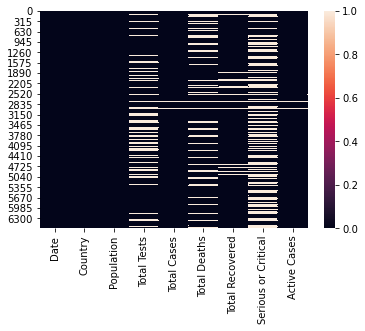

In [35]:
sns.heatmap(df.isna())

In [36]:
df_age_factor.isna().sum()

Country                      0
Fraction age 0-14 years     37
Fraction age 15-64 years    37
Fraction age 65+ years      37
dtype: int64

In [37]:
df_age_factor.isna().mean()

Country                     0.000000
Fraction age 0-14 years     0.173709
Fraction age 15-64 years    0.173709
Fraction age 65+ years      0.173709
dtype: float64

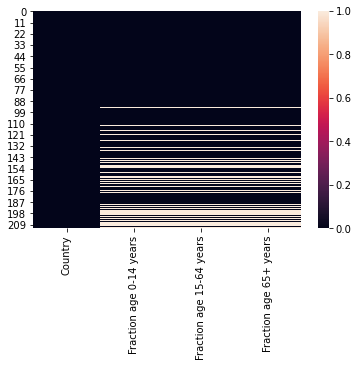

In [38]:
sns.heatmap(df_age_factor.isna())

In [39]:
## checking for correlation

In [40]:
df.corr()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
Population,1.000000,0.307950,0.225890,0.177861,0.309692,0.231260,0.179396
Total Tests,0.307950,1.000000,0.900321,0.811128,0.825681,0.744832,0.859148
Total Cases,0.225890,0.900321,1.000000,0.934705,0.829137,0.890988,0.977766
Total Deaths,0.177861,0.811128,0.934705,1.000000,0.840124,0.829517,0.892579
Total Recovered,0.309692,0.825681,0.829137,0.840124,1.000000,0.722190,0.694193
Serious or Critical,0.231260,0.744832,0.890988,0.829517,0.722190,1.000000,0.875427
Active Cases,0.179396,0.859148,0.977766,0.892579,0.694193,0.875427,1.000000


In [41]:
# helper function
def fig_of_size(x,y):
    return plt.figure(figsize=(x,y))

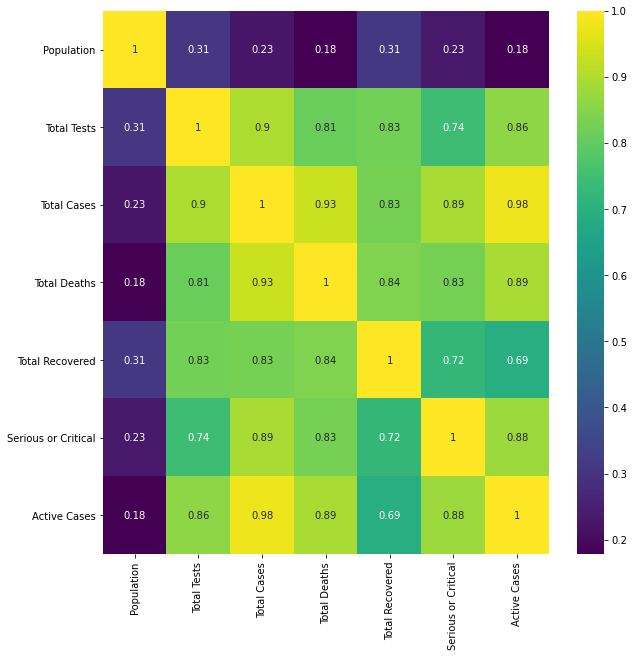

In [42]:
#plotting the correlation
fig_of_size(10,10)
sns.heatmap(df.corr(),cmap='viridis',annot=True)

* We have 2 datasets ,on containing covid data and the other containing age factor.
* There are missing values in both of the datasets.
* Except the population feature every feature have very high correlation

## Exploratory Data Analysis.

In [43]:
df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [44]:
df_age_factor

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045


In [45]:
df_merged = pd.concat([df_age_factor,df],axis=1)#.dropna(subset=['Country'],)

In [46]:
df_merged = df_merged.iloc[:,~df_merged.columns.duplicated()]

In [49]:
df_merged.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Date,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,USA,0.189,0.657,0.154,2020-04-18,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,Russia,0.176,0.682,0.142,2020-04-18,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,Spain,0.147,0.659,0.194,2020-04-18,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,Brazil,0.217,0.697,0.086,2020-04-18,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,UK,0.177,0.638,0.185,2020-04-18,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [50]:
df_merged['Fraction_death Children'] = df_merged['Fraction age 0-14 years'] * df_merged['Total Deaths']
df_merged['Fraction_death Mid-aged'] = df_merged['Fraction age 15-64 years'] * df_merged['Total Deaths']
df_merged['Fraction_death Senior Citizen'] = df_merged['Fraction age 65+ years'] * df_merged['Total Deaths']

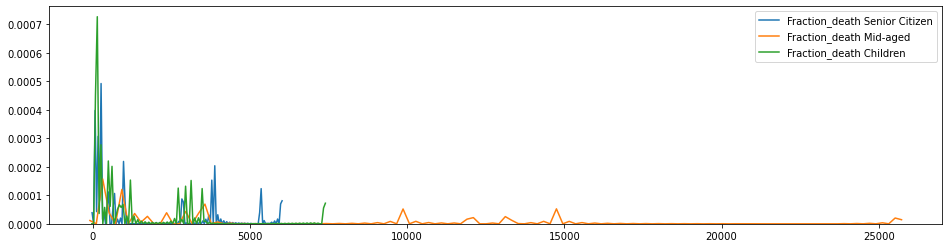

In [57]:
fig_of_size(16,4)
sns.kdeplot(df_merged.iloc[:,-1])
sns.kdeplot(df_merged.iloc[:,-2])
sns.kdeplot(df_merged.iloc[:,-3])

In [54]:
df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [27]:
# Country

In [28]:
df.Country.value_counts()

S. Korea           31
Guatemala          31
Egypt              31
North Macedonia    31
Latvia             31
                   ..
Kenya              31
Hungary            31
Tanzania           31
Brunei             31
Curaçao            31
Name: Country, Length: 213, dtype: int64

In [29]:
df.Country.unique()

array(['USA', 'Russia', 'Spain', 'Brazil', 'UK', 'Italy', 'France',
       'Germany', 'Turkey', 'Iran', 'India', 'Peru', 'China', 'Canada',
       'Saudi Arabia', 'Belgium', 'Mexico', 'Chile', 'Netherlands',
       'Pakistan', 'Qatar', 'Ecuador', 'Switzerland', 'Belarus', 'Sweden',
       'Portugal', 'Singapore', 'Ireland', 'UAE', 'Bangladesh', 'Poland',
       'Ukraine', 'Indonesia', 'Romania', 'Israel', 'South Africa',
       'Japan', 'Colombia', 'Austria', 'Kuwait', 'Egypt',
       'Dominican Republic', 'Philippines', 'S. Korea', 'Denmark',
       'Serbia', 'Panama', 'Czechia', 'Argentina', 'Norway', 'Algeria',
       'Bahrain', 'Afghanistan', 'Australia', 'Morocco', 'Malaysia',
       'Kazakhstan', 'Finland', 'Nigeria', 'Moldova', 'Ghana', 'Oman',
       'Armenia', 'Bolivia', 'Luxembourg', 'Iraq', 'Hungary', 'Cameroon',
       'Azerbaijan', 'Thailand', 'Greece', 'Guinea', 'Uzbekistan',
       'Honduras', 'Sudan', 'Senegal', 'Bosnia and Herzegovina',
       'Bulgaria', 'Croatia', 'I

In [30]:
len(df.Country.unique())

213

In [31]:
df[df.Country == 'India']

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
10,2020-04-18,India,1378381772,335123.0,16365.0,521.0,2463.0,NaN,13381.0
223,2020-04-19,India,1378381772,401586.0,17615.0,559.0,2854.0,NaN,14202.0
436,2020-04-20,India,1378381772,401586.0,18539.0,592.0,3273.0,NaN,14674.0
649,2020-04-21,India,1378381772,447812.0,20080.0,645.0,3975.0,NaN,15460.0
862,2020-04-22,India,1378381772,462621.0,21370.0,681.0,4370.0,NaN,16319.0
1075,2020-04-23,India,1378381772,500542.0,23039.0,721.0,5012.0,NaN,17306.0
1288,2020-04-24,India,1378381772,541789.0,24447.0,780.0,5496.0,NaN,18171.0
1501,2020-04-25,India,1378381772,579957.0,26283.0,825.0,5939.0,NaN,19519.0
1714,2020-04-26,India,1378381772,625309.0,27890.0,881.0,6523.0,NaN,20486.0
1927,2020-04-27,India,1378381772,665819.0,29451.0,939.0,7137.0,NaN,21375.0


* the dataconsists of 213 countries.
* there are 13 samples of each country .
* The data percountry ranges from 18 April to 18 May 2020

In [32]:
# Popluation

In [33]:
# country wise popluation.

In [23]:
# Get the world happiness ranking of the world

data = [go.Choropleth(
               colorscale = 'armyrose',
               locationmode = 'country names',
               locations = df['Country'],
               text = df['Country'], 
               z = df['Population'],
               )]

layout = dict(title = 'Population',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))

fig = go.Figure(data = data ,layout = layout)
iplot(fig)

* The population of India and China is no where near the rest of the world.

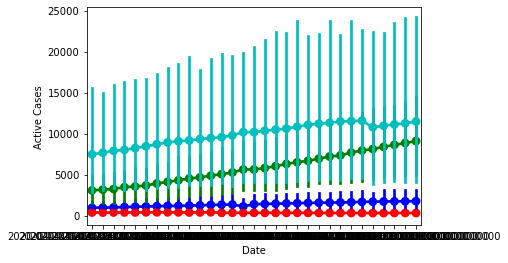

In [35]:
from itertools import cycle
cycol = cycle('bgrcmk')

for col in df.columns[5:]:
    
    sns.pointplot(df.Date,df[col],color=next(cycol))

In [36]:
## feature engineering 

In [37]:
def recovery_rate(x):
    

    try:
        return x['Total Recovered'] / x['Total Cases'] * 100
    except ZeroDivisionError:
        return 0

def death_rate(x):
    

    try:
        return x['Total Deaths'] / x['Total Cases'] *100
    except ZeroDivisionError:
        return 0

In [38]:
df['recov_rate'] = df.apply(recovery_rate,axis=1)
df['death_rate'] = df.apply(death_rate,axis=1)

In [39]:
df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,recov_rate,death_rate
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,9.240625,5.280783
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,8.308646,0.850705
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,38.472657,10.309337
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,38.195087,6.429388
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0,NaN,13.539140
...,...,...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0,100.000000,NaN
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0,100.000000,NaN
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0,100.000000,NaN
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN


In [40]:
df['DD'] = df.Date.apply(lambda x : x.day)

In [41]:
df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,recov_rate,death_rate,DD
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,9.240625,5.280783,18
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,8.308646,0.850705,18
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,38.472657,10.309337,18
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,38.195087,6.429388,18
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0,NaN,13.539140,18
...,...,...,...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0,100.000000,NaN,18
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0,100.000000,NaN,18
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0,100.000000,NaN,18
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,18


In [42]:
# revocery rate vs the death rate

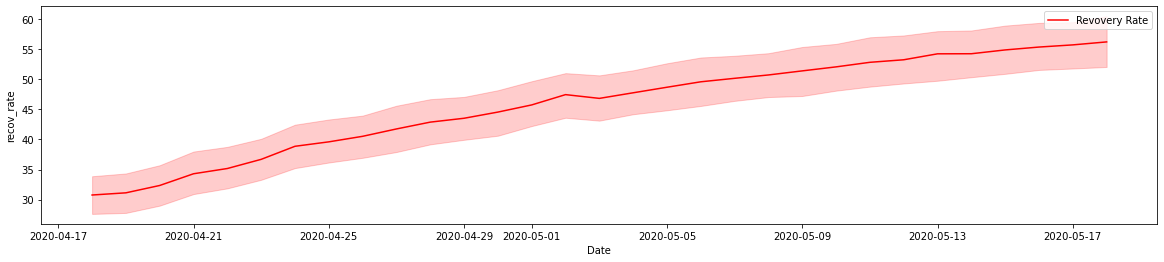

In [43]:
fig_of_size(20,4)
sns.lineplot(df.Date,df.recov_rate,color='red',label='Revovery Rate')
plt.legend()

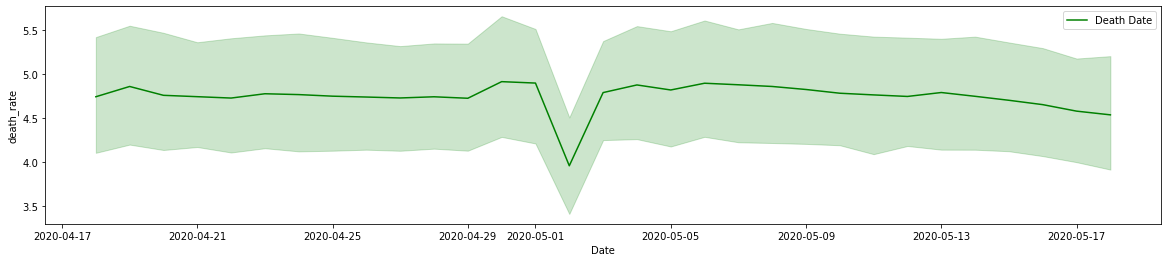

In [44]:
fig_of_size(20,4)
sns.lineplot(df.Date,df.death_rate,color='green',label='Death Date')
plt.legend()

* The reovery rate was gradually increasing and the death rate was mostly uniform.

In [163]:
# let's take India as an Contry Example and do some time series analysis.

In [6]:
df_India = df[df.Country == 'India'].copy()

In [8]:
df_India

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
10,2020-04-18,India,1378381772,335123.0,16365.0,521.0,2463.0,NaN,13381.0
223,2020-04-19,India,1378381772,401586.0,17615.0,559.0,2854.0,NaN,14202.0
436,2020-04-20,India,1378381772,401586.0,18539.0,592.0,3273.0,NaN,14674.0
649,2020-04-21,India,1378381772,447812.0,20080.0,645.0,3975.0,NaN,15460.0
862,2020-04-22,India,1378381772,462621.0,21370.0,681.0,4370.0,NaN,16319.0
1075,2020-04-23,India,1378381772,500542.0,23039.0,721.0,5012.0,NaN,17306.0
1288,2020-04-24,India,1378381772,541789.0,24447.0,780.0,5496.0,NaN,18171.0
1501,2020-04-25,India,1378381772,579957.0,26283.0,825.0,5939.0,NaN,19519.0
1714,2020-04-26,India,1378381772,625309.0,27890.0,881.0,6523.0,NaN,20486.0
1927,2020-04-27,India,1378381772,665819.0,29451.0,939.0,7137.0,NaN,21375.0


In [9]:
# total tests in this period

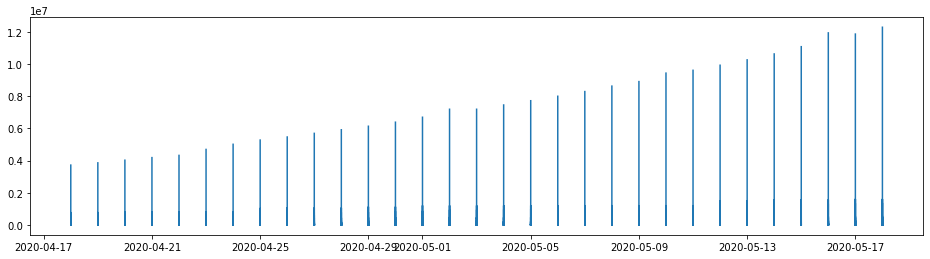

In [14]:
fig_of_size(16,4)
plt.plot(df.Date,df['Total Tests'])

In [16]:
# recovery in this period

In [18]:
px.line(df,'Date','Total Recovered')

* The total number of recovered patient increases dat by day.

In [45]:
# Active Cases 

In [46]:
df.groupby('Country').sum().sort_values('Active Cases',ascending=False)#['Active Cases'][:10]

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,recov_rate,death_rate,DD
Country,,,,,,,,,,
USA,10254014584,232000501.0,36196503.0,2102393.0,6004896.0,488102.0,28115408.0,486.081854,178.879403,483
UK,2103171471,40873492.0,5723955.0,825478.0,0.0,48329.0,3864943.0,0.000000,444.697947,483
Russia,4523746052,130214963.0,4579604.0,42407.0,745508.0,61916.0,3802264.0,416.261463,28.526954,483
Italy,1874629644,66944808.0,6416833.0,881699.0,2621286.0,48807.0,2915063.0,1246.205431,425.337757,483
France,2022961606,29505482.0,5239029.0,761760.0,1565154.0,116069.0,2912277.0,921.257282,449.535208,483
...,...,...,...,...,...,...,...,...,...,...
Saint Pierre Miquelon,179707,0.0,31.0,0.0,8.0,0.0,23.0,800.000000,0.000000,483
Anguilla,464597,0.0,93.0,0.0,75.0,0.0,18.0,2500.000000,0.000000,483
Lesotho,66347285,0.0,6.0,0.0,0.0,0.0,6.0,0.000000,0.000000,483


In [47]:
px.bar(data_frame=df.groupby('Country').sum().sort_values('Active Cases',ascending=False).iloc[:10,:],x='Active Cases',y=df.groupby('Country').sum().sort_values('Active Cases',ascending=False).index[:10],orientation='h')

## Adressing Missing values

In [48]:
df.isna().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             60
recov_rate              285
death_rate             1236
DD                        0
dtype: int64

In [49]:
df_cleaned = df[~df['Total Deaths'].isna()].copy()

In [50]:
df_cleaned.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,recov_rate,death_rate,DD
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,9.240625,5.280783,18
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,8.308646,0.850705,18
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,38.472657,10.309337,18
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,38.195087,6.429388,18
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0,NaN,13.539140,18


In [51]:
df_cleaned.isna().sum()

Date                      0
Country                   0
Population                0
Total Tests             718
Total Cases               0
Total Deaths              0
Total Recovered         114
Serious or Critical    1500
Active Cases             10
recov_rate              114
death_rate                0
DD                        0
dtype: int64

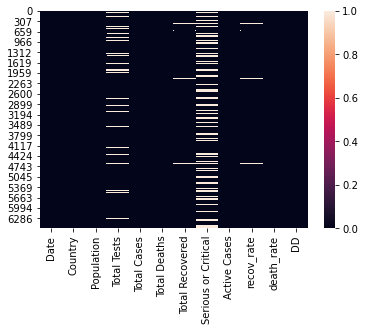

In [52]:
sns.heatmap(df_cleaned.isna())

In [53]:
# drop the serious and critical feautre as it havs many missing values and the feeature is hihly collinear.

In [54]:
df_cleaned.drop('Serious or Critical',1,inplace=True)

In [55]:
df_cleaned.isna().sum()

Date                 0
Country              0
Population           0
Total Tests        718
Total Cases          0
Total Deaths         0
Total Recovered    114
Active Cases        10
recov_rate         114
death_rate           0
DD                   0
dtype: int64

In [56]:
# addressing the rest of the missing values 

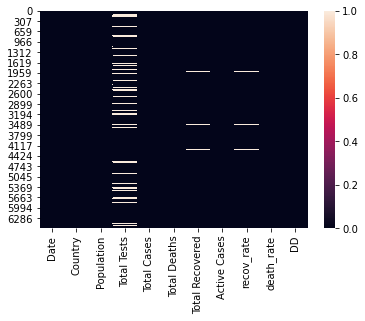

In [57]:
sns.heatmap(df_cleaned.isna())

In [58]:
from feature_engine.missing_data_imputers import RandomSampleImputer,MeanMedianImputer

In [59]:
features_to_imput = ['Total Tests','Total Recovered','recov_rate']

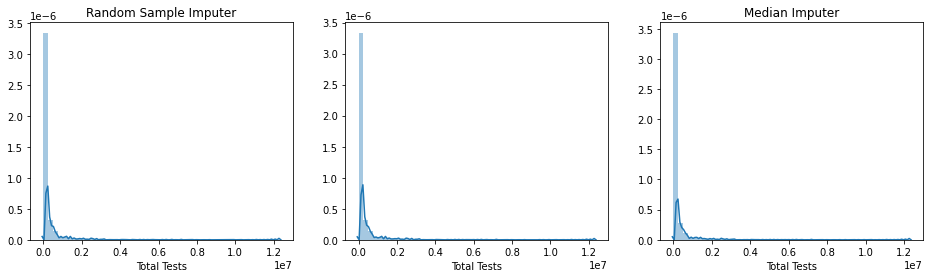

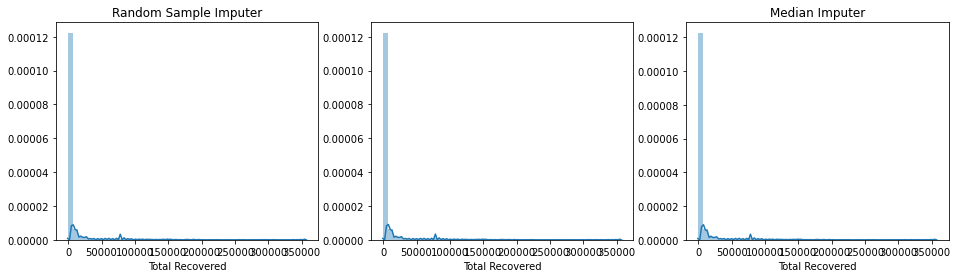

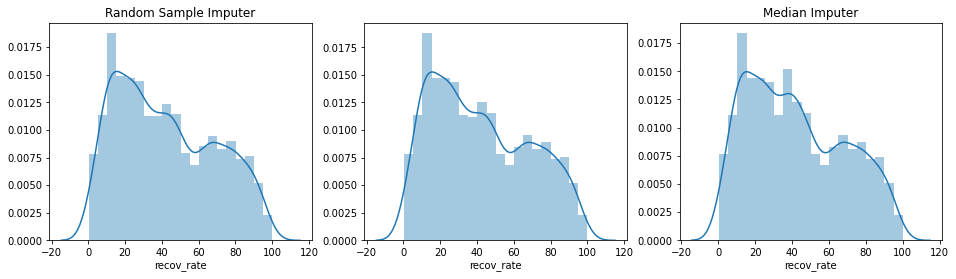

In [60]:

for feat in features_to_imput:

    fig = fig_of_size(16,4)
    
    fig.add_subplot(131)
    sns.distplot(RandomSampleImputer(variables=[feat]).fit_transform(df_cleaned)[feat])
    plt.title('Random Sample Imputer')
    fig.add_subplot(132)
    sns.distplot(df_cleaned[feat])
    
    fig.add_subplot(133)
    sns.distplot(MeanMedianImputer(variables=[feat]).fit_transform(df_cleaned)[feat])
    plt.title('Median Imputer')


In [62]:
# random sample imputing works best, let's finalize it

In [63]:
df_cleaned = RandomSampleImputer(variables=features_to_imput).fit_transform(df_cleaned)

In [64]:
df_cleaned.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Active Cases,recov_rate,death_rate,DD
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,631509.0,9.240625,5.280783,18
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,33423.0,8.308646,0.850705,18
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,99576.0,38.472657,10.309337,18
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,20335.0,38.195087,6.429388,18
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,176.0,98409.0,20.158387,13.539140,18


In [65]:
df_cleaned.isna().sum()

Date                0
Country             0
Population          0
Total Tests         0
Total Cases         0
Total Deaths        0
Total Recovered     0
Active Cases       10
recov_rate          0
death_rate          0
DD                  0
dtype: int64

In [66]:
df_cleaned.drop('Date',1,inplace=True)

In [70]:
# numerical and categorical list of features
from feature_engine.missing_data_imputers import _find_categorical_variables,_find_numerical_variables

In [72]:
cat_var = _find_categorical_variables(df_cleaned)
num_var = _find_numerical_variables(df_cleaned)

In [73]:
cat_var

['Country']

In [74]:
num_var

['Population',
 'Total Tests',
 'Total Cases',
 'Total Deaths',
 'Total Recovered',
 'Active Cases',
 'recov_rate',
 'death_rate',
 'DD']

## removing the outliers from the dataset

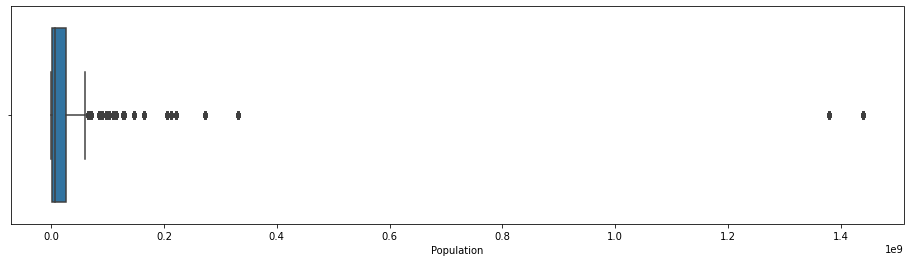

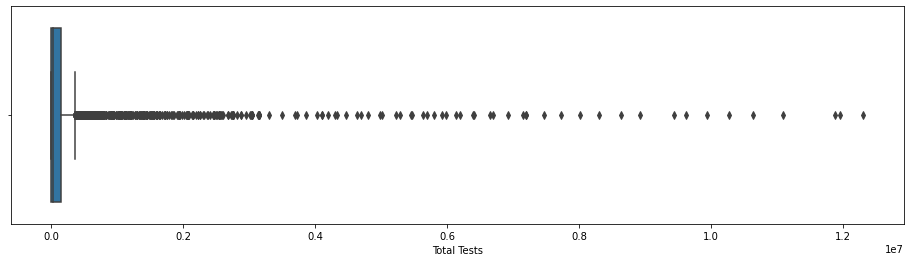

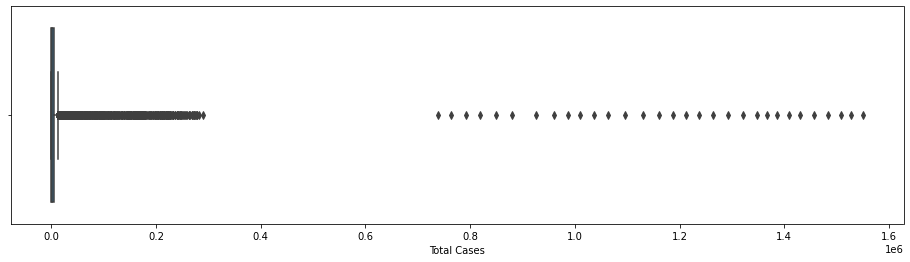

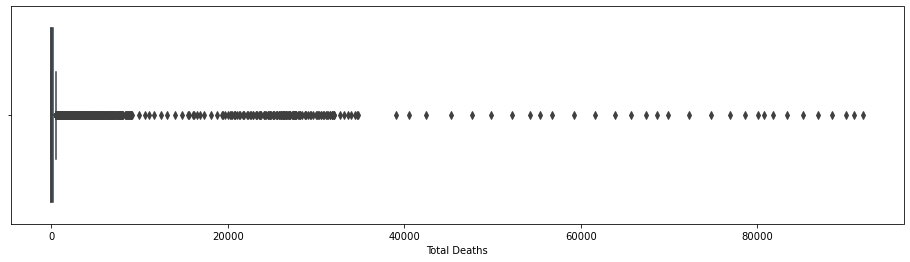

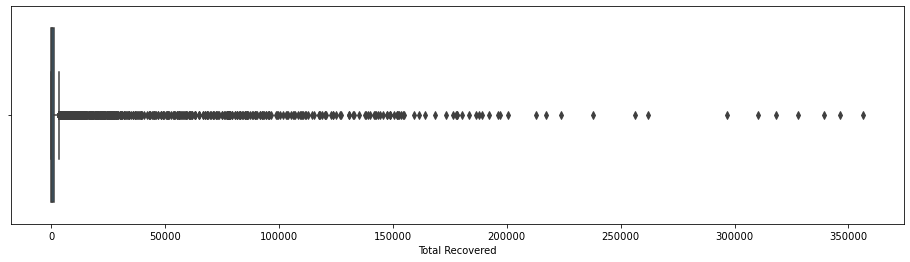

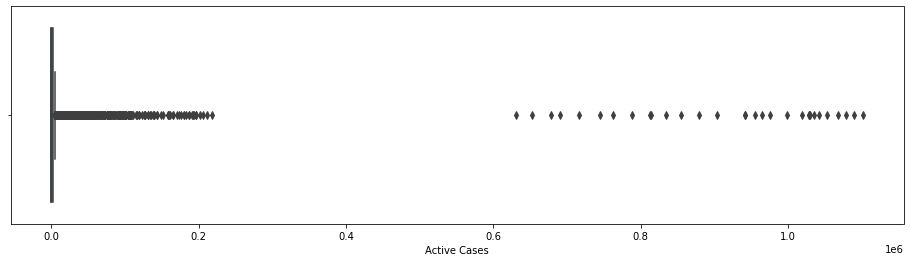

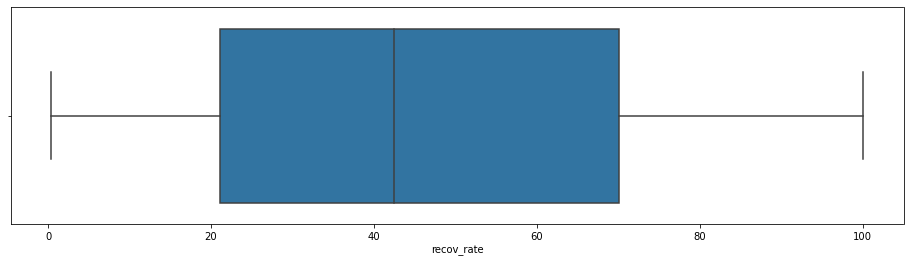

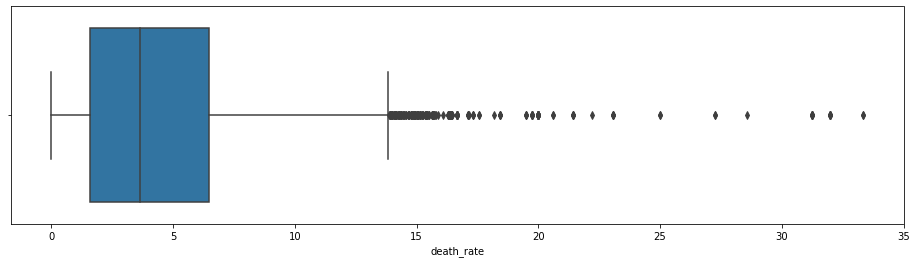

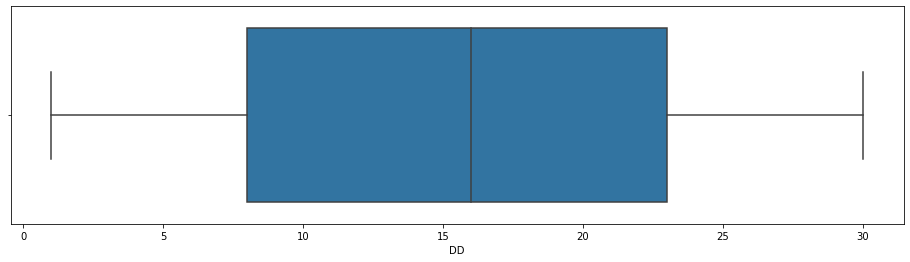

In [76]:
for col in num_var:
    fig_of_size(16,4)
    sns.boxplot(df[col])

In [82]:
# adressing the outliers using the z-score

In [84]:
df_cleaned.isna().sum()

Country             0
Population          0
Total Tests         0
Total Cases         0
Total Deaths        0
Total Recovered     0
Active Cases       10
recov_rate          0
death_rate          0
DD                  0
dtype: int64

In [86]:
df_cleaned.dropna(subset=['Active Cases'],inplace=True)

In [88]:
z_scores = stats.zscore(df_cleaned[num_var])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_cleaned = df_cleaned[filtered_entries]

In [89]:
df_cleaned

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Active Cases,recov_rate,death_rate,DD
1,Russia,145927292,1831892.0,36793.0,313.0,3057.0,33423.0,8.308646,0.850705,18
2,Spain,46752703,930230.0,194416.0,20043.0,74797.0,99576.0,38.472657,10.309337,18
3,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,20335.0,38.195087,6.429388,18
4,UK,67844241,460437.0,114217.0,15464.0,176.0,98409.0,20.158387,13.539140,18
6,France,65256826,463662.0,151793.0,19323.0,35983.0,96487.0,23.705309,12.729836,18
...,...,...,...,...,...,...,...,...,...,...
6588,Turks and Caicos,38653,109.0,12.0,1.0,10.0,1.0,83.333333,8.333333,18
6590,Comoros,867268,55415.0,11.0,1.0,3.0,7.0,27.272727,9.090909,18
6591,Montserrat,4992,36.0,11.0,1.0,10.0,0.0,90.909091,9.090909,18
6592,Suriname,586006,404.0,11.0,1.0,9.0,1.0,81.818182,9.090909,18


## Skewness of the features

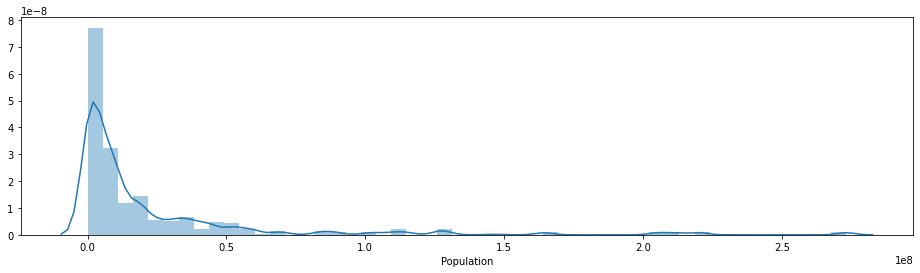

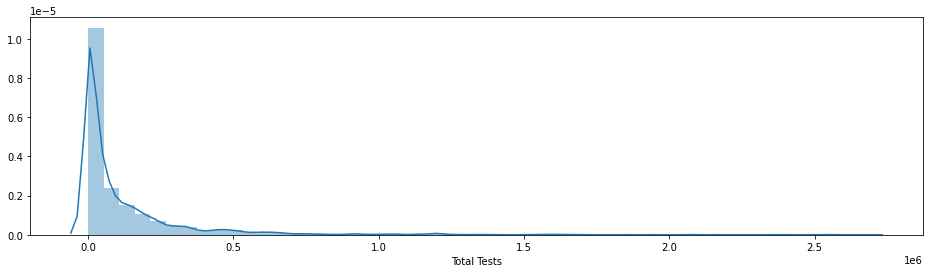

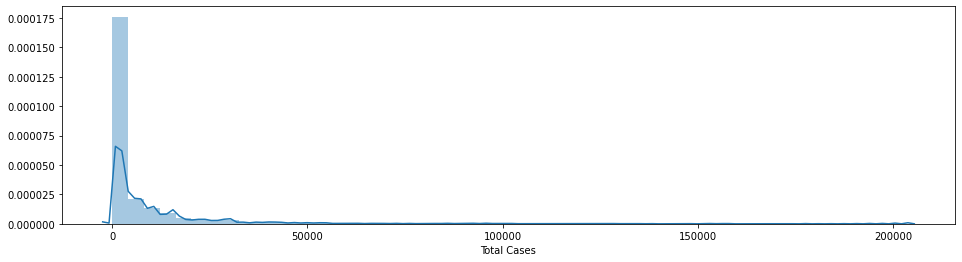

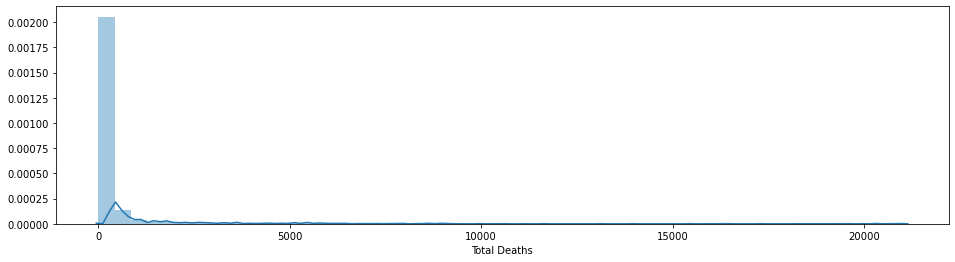

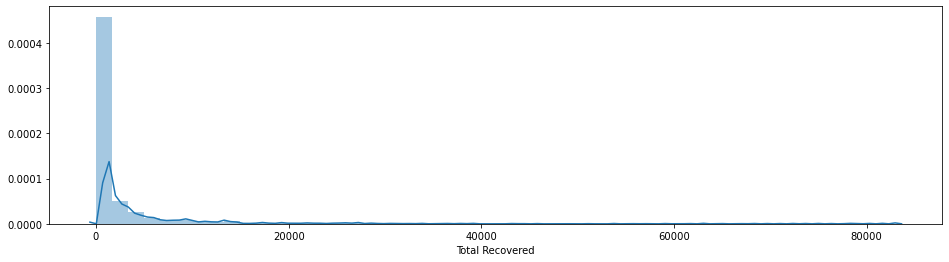

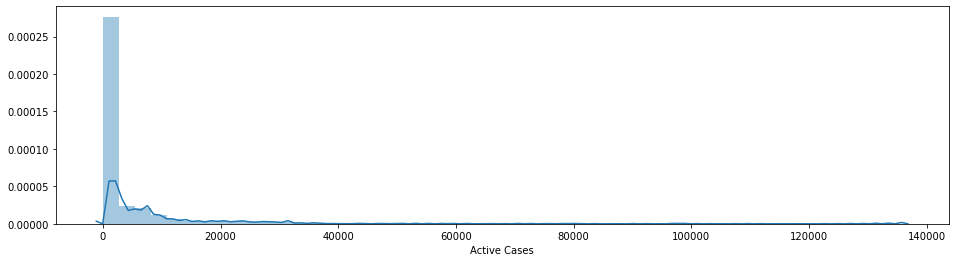

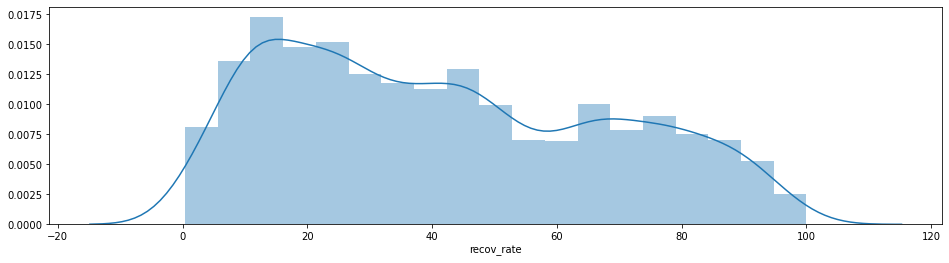

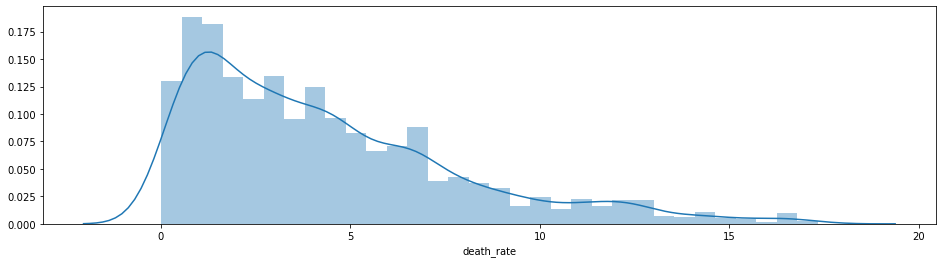

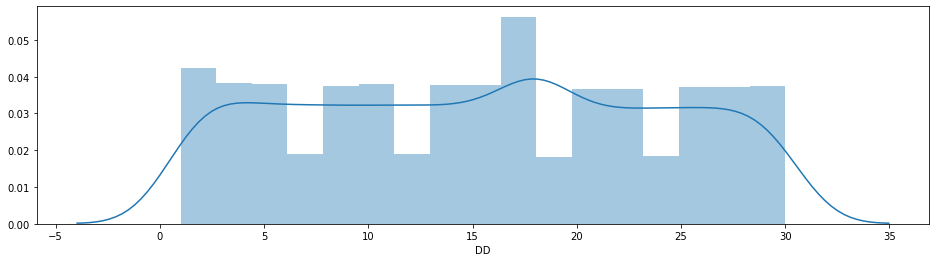

In [94]:
for col in num_var:
    fig_of_size(16,4)
    sns.distplot(df_cleaned[col])

In [95]:
# most of the features are highlly skewed.

In [96]:
# skew stats

In [98]:
df_cleaned.skew()

Population         3.406020
Total Tests        4.602478
Total Cases        5.429575
Total Deaths       8.223121
Total Recovered    6.323133
Active Cases       5.897401
recov_rate         0.363309
death_rate         1.159170
DD                -0.004512
dtype: float64

In [99]:
# addressing the skewes 

In [101]:
# try1: logarithmic transforamtion
np.log1p(df_cleaned[num_var]).skew()

Population        -0.749012
Total Tests       -0.526953
Total Cases       -0.107139
Total Deaths       0.629565
Total Recovered   -0.006807
Active Cases      -0.212203
recov_rate        -1.038669
death_rate        -0.079206
DD                -0.994870
dtype: float64

In [102]:
# try2 : Square Root transformation
np.sqrt(df_cleaned[num_var]).skew()

Population         1.619017
Total Tests        1.659376
Total Cases        2.339438
Total Deaths       3.772419
Total Recovered    2.856335
Active Cases       2.407494
recov_rate        -0.187492
death_rate         0.270533
DD                -0.506120
dtype: float64

In [104]:
# logarithmic transformation works miracles, finalize it!

In [107]:
df_cleaned[num_var] = np.log1p(df_cleaned[num_var])

In [109]:
df_cleaned

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Active Cases,recov_rate,death_rate,DD
1,Russia,2.985612,2.735721,2.443485,1.909453,2.200056,2.435106,1.172774,0.479686,1.372307
2,Spain,2.926403,2.690781,2.578531,2.389284,2.503282,2.526423,1.542359,1.231285,1.372307
3,Brazil,3.004389,2.489120,2.443317,2.171025,2.356006,2.390610,1.540849,1.100425,1.372307
4,UK,2.946160,2.641906,2.537330,2.365216,1.820695,2.525480,1.399220,1.302055,1.372307
6,France,2.944115,2.642403,2.559572,2.385924,2.441549,2.523901,1.436754,1.286356,1.372307
...,...,...,...,...,...,...,...,...,...,...
6588,Turks and Caicos,2.447759,1.740550,1.271150,0.526589,1.223156,0.526589,1.692819,1.173594,1.372307
6590,Comoros,2.686016,2.478438,1.248441,0.526589,0.869742,1.124748,1.468311,1.197442,1.372307
6591,Montserrat,2.252953,1.528427,1.248441,0.526589,1.223156,0.000000,1.708523,1.197442,1.372307
6592,Suriname,2.658936,1.946465,1.248441,0.526589,1.194706,0.526589,1.689477,1.197442,1.372307


## Once Hot encoding

In [90]:
cat_var

['Country']

In [111]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [112]:
ohc = OneHotCategoricalEncoder(variables=cat_var)

In [113]:
df_cleaned = ohc.fit_transform(df_cleaned)

In [114]:
df_cleaned.head()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Active Cases,recov_rate,death_rate,DD,Country_Russia,...,Country_Comoros,Country_Greenland,Country_Seychelles,Country_Papua New Guinea,Country_Caribbean Netherlands,Country_St. Barth,Country_Western Sahara,Country_Anguilla,Country_Saint Pierre Miquelon,Country_Yemen
1,2.985612,2.735721,2.443485,1.909453,2.200056,2.435106,1.172774,0.479686,1.372307,1,...,0,0,0,0,0,0,0,0,0,0
2,2.926403,2.690781,2.578531,2.389284,2.503282,2.526423,1.542359,1.231285,1.372307,0,...,0,0,0,0,0,0,0,0,0,0
3,3.004389,2.489120,2.443317,2.171025,2.356006,2.390610,1.540849,1.100425,1.372307,0,...,0,0,0,0,0,0,0,0,0,0
4,2.946160,2.641906,2.537330,2.365216,1.820695,2.525480,1.399220,1.302055,1.372307,0,...,0,0,0,0,0,0,0,0,0,0
6,2.944115,2.642403,2.559572,2.385924,2.441549,2.523901,1.436754,1.286356,1.372307,0,...,0,0,0,0,0,0,0,0,0,0


## X and y split

In [115]:
X = df_cleaned.drop('death_rate',1)
y = df_cleaned['death_rate']

In [121]:
X.shape,y.shape

((5007, 214), (5007,))

## Train and Test Split

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [119]:
# checking the shapes 

In [122]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3354, 214), (3354,), (1653, 214), (1653,))

## Building up the model

In [123]:
# import training dependencies
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [157]:
# import the evaluation metrics dependenices
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,roc_auc_score

In [125]:
# helper function
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    print('MSE:',mean_squared_error(y_test,y_preds))
    print('R2_Score',r2_score(y_test,y_preds))  

In [126]:
# try1: Linear Regression
train_n_ret_scores(LinearRegression())

MSE: 9.872671240888975e+18
R2_Score -1.1031491770356403e+20


In [127]:
# try4: SVR
train_n_ret_scores(SVR())

MSE: 0.006788777277123157
R2_Score 0.9241437916486084


In [128]:
# try5: Decision Trees
train_n_ret_scores(DecisionTreeRegressor(criterion='mse'))

MSE: 0.0006033277515217677
R2_Score 0.9932585569160097


In [129]:
# try6: Random Forest
train_n_ret_scores(RandomForestRegressor())

MSE: 0.00032144069696018156
R2_Score 0.9964082968867759


In [130]:
# try7: Gradient Boosting
train_n_ret_scores(GradientBoostingRegressor())

MSE: 0.0027229746212221306
R2_Score 0.9695741189066511


In [131]:
# try3: Adaboost

train_n_ret_scores(AdaBoostRegressor(base_estimator=DecisionTreeRegressor()))

MSE: 0.00014498734238773957
R2_Score 0.9983799453710847


In [134]:
#let's create the models dataframe
models = [LinearRegression(),Ridge(alpha=0.001),Lasso(alpha=0.0003),ElasticNet(alpha=0.0001),SVR(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(base_estimator=DecisionTreeRegressor())]
model_names = 'Linear Ridge Lasso ElasticNet SVR Descision_Tree Random_Forest Gradient_Boost Ada_Boost'.split()
models_df = pd.DataFrame(columns=['Model','MSE','R2','meanCV'])
for model,model_names in zip(models,model_names):
    print(model)
    
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    mse = mean_squared_error(y_test,y_preds)
    r2 = r2_score(y_test,y_preds)
    avgCV = np.mean(cross_val_score(model,X,y,scoring='r2'))
    
    
    models_df = models_df.append({'Model':model_names,'MSE':mse,'R2':r2,'meanCV':avgCV},ignore_index=True)


LinearRegression()
Ridge(alpha=0.001)
Lasso(alpha=0.0003)
ElasticNet(alpha=0.0001)
SVR()
DecisionTreeRegressor()
RandomForestRegressor()
GradientBoostingRegressor()
AdaBoostRegressor(base_estimator=DecisionTreeRegressor())


In [135]:
models_df

,Model,MSE,R2,meanCV
0,Linear,9.872671e+18,-1.103149e+20,-7.138433e+20
1,Ridge,4.042781e-03,9.548269e-01,9.531291e-01
2,Lasso,6.411175e-03,9.283630e-01,9.415565e-01
3,ElasticNet,4.631467e-03,9.482491e-01,9.560932e-01
4,SVR,6.788777e-03,9.241438e-01,9.067867e-01
5,Descision_Tree,6.463701e-04,9.927776e-01,8.809055e-01
6,Random_Forest,3.351971e-04,9.962546e-01,9.139732e-01
7,Gradient_Boost,2.730930e-03,9.694852e-01,8.948512e-01
8,Ada_Boost,1.219797e-04,9.986370e-01,9.239817e-01


* Regresion Techniques work better than ensemble techniques for this problem.
* Ridge regression is giving us the best coprss validation score

In [137]:
best_model = Ridge(alpha=0.001)

In [138]:
train_n_ret_scores(best_model)

MSE: 0.004042781436082236
R2_Score 0.9548269064639946


## Hypertunning the best model

In [143]:
param_dict = {'alpha' : [1.0,0.1,0.01,0.001]}

In [144]:
from sklearn.model_selection import GridSearchCV

In [147]:
gs_model = GridSearchCV(best_model,param_grid=param_dict,cv=5,scoring='r2',verbose=2)

In [149]:
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] alpha=1.0 .......................................................
[CV] ........................................ alpha=1.0, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ........................................ alpha=1.0, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ........................................ alpha=1.0, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ........................................ alpha=1.0, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ........................................ alpha=1.0, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.1s
[CV] alpha=0.1 .......................................................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] ........................................ alpha=0.1, total=   0.1s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] 

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=Ridge(alpha=0.001),
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001]}, scoring='r2',
             verbose=2)

In [150]:
gs_model.best_params_

{'alpha': 0.1}

In [151]:
best_model = Ridge(alpha=0.1)

In [152]:
train_n_ret_scores(best_model)

MSE: 0.0038021080554740323
R2_Score 0.9575161344882474


In [153]:
y_preds = best_model.predict(X_test)

In [154]:
y_preds

array([0.73080475, 0.78478923, 1.17656283, ..., 1.18045968, 1.07756071,
       0.7884576 ])

## Saving the best model

In [162]:
import joblib
joblib.dump(best_model,'covid_worldwise_death_rate.pkl')

['covid_worldwise_death_rate.pkl']